In [1]:
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from scipy.stats import ks_2samp

In [2]:
#  Abrindo o dataset
df = pd.read_excel(r"C:\Users\sabri\MBA Times - Final - Nova variavel.xlsx")
df.head()

,replay_id,replay_title,date,result,team_name,opposing_team_name,score,saves,shots,demos_inflicted,demos_taken,shooting_percentage,save_conceded,goals_solo,goals_assists
0,4b679bcb-07b3-4e92-b9d5-dd93627b31e3,APAC Y GS vs K16 G3 2022-10-22.19.06,2022-10-22,loss,1620 KINGS,GOD SPEED,0,0,0,0,0,0.00,0.00,0,0
1,049ddd16-91ff-42b5-97f3-19fa67c3c55f,APAC A JMCH VS K16 G3 2022-10-23.17.19,2022-10-23,loss,1620 KINGS,JAMES CHEESE,488,1,2,3,4,0.00,0.14,0,0
2,761466d2-cb6d-4da2-a9aa-3861a4f0a858,APAC Q K16 vs JMCH G2 2022-10-08.18.15,2022-10-08,loss,1620 KINGS,JAMES CHEESE,833,8,2,3,4,0.00,0.47,0,0
3,ef7ced67-3865-4d13-8aad-cca35a8ba38d,APAC Q K16 vs JMCH G1 2022-10-08.18.03,2022-10-08,loss,1620 KINGS,JAMES CHEESE,988,5,2,3,3,100.00,0.28,1,1
4,8c15d7f6-4162-44cd-8dd0-42b9ce60d92d,APAC J K16 vs TL G2 2022-10-08.16.48,2022-10-08,loss,1620 KINGS,TOUGH LOVE,830,4,3,3,3,33.33,0.50,0,1


In [3]:
#  Transformando result em variável binária. Loss = 1 e win = 0
df1 = pd.get_dummies(df['result'])
#df1.head()
df1 = df1.drop(['win'], axis = 1)
#df1.head()
df = pd.concat((df, df1), axis = 1)
#df.head()
df = df.drop(['result'], axis = 1)
df = df.rename(columns = {'loss': 'result'})
df.head()

,replay_id,replay_title,date,team_name,opposing_team_name,score,saves,shots,demos_inflicted,demos_taken,shooting_percentage,save_conceded,goals_solo,goals_assists,result
0,4b679bcb-07b3-4e92-b9d5-dd93627b31e3,APAC Y GS vs K16 G3 2022-10-22.19.06,2022-10-22,1620 KINGS,GOD SPEED,0,0,0,0,0,0.00,0.00,0,0,1
1,049ddd16-91ff-42b5-97f3-19fa67c3c55f,APAC A JMCH VS K16 G3 2022-10-23.17.19,2022-10-23,1620 KINGS,JAMES CHEESE,488,1,2,3,4,0.00,0.14,0,0,1
2,761466d2-cb6d-4da2-a9aa-3861a4f0a858,APAC Q K16 vs JMCH G2 2022-10-08.18.15,2022-10-08,1620 KINGS,JAMES CHEESE,833,8,2,3,4,0.00,0.47,0,0,1
3,ef7ced67-3865-4d13-8aad-cca35a8ba38d,APAC Q K16 vs JMCH G1 2022-10-08.18.03,2022-10-08,1620 KINGS,JAMES CHEESE,988,5,2,3,3,100.00,0.28,1,1,1
4,8c15d7f6-4162-44cd-8dd0-42b9ce60d92d,APAC J K16 vs TL G2 2022-10-08.16.48,2022-10-08,1620 KINGS,TOUGH LOVE,830,4,3,3,3,33.33,0.50,0,1,1


In [4]:
df = df.dropna(axis = 0)

In [5]:
periodo_des = df[df['date'] < datetime(2023,6,1)].copy()

oot = df[df['date'] >= datetime(2023,6,1)].copy()


In [6]:
x_oot = oot.drop('result', axis=1)
x_oot = x_oot.drop('replay_id', axis=1)
x_oot = x_oot.drop('replay_title', axis=1)
x_oot = x_oot.drop('date', axis=1)
x_oot = x_oot.drop('team_name', axis=1)
x_oot = x_oot.drop('opposing_team_name', axis=1)
y_oot = oot['result']


In [7]:
from sklearn.model_selection import train_test_split

X = periodo_des.drop('result', axis=1)
X = X.drop('replay_id', axis=1)
X = X.drop('replay_title', axis=1)
X = X.drop('date', axis=1)
X = X.drop('team_name', axis=1)
X = X.drop('opposing_team_name', axis=1)
y = periodo_des['result']
  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((12902, 9), (4301, 9))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the mode
y_pred = model.predict(X_test)
classification_report(y_test, y_pred)
# performance evaluatio metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2174
           1       0.88      0.89      0.89      2127

    accuracy                           0.89      4301
   macro avg       0.89      0.89      0.89      4301
weighted avg       0.89      0.89      0.89      4301



In [9]:
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [6, 9, 12],
    'max_leaf_nodes': [6, 9, 12, 15],
}

In [10]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=15,
                       n_estimators=50)


In [15]:
model = RandomForestClassifier(n_estimators = 50, max_features = 'log2', max_depth = 9, max_leaf_nodes = 15)
model.fit(X_train, y_train)


# predict the mode
y_pred = model.predict(X_test)
av1 = classification_report(y_test, y_pred)
y_pred1 = model.predict(x_oot)
av2 = classification_report(y_oot, y_pred1)
# performance evaluatio metrics
print(av1, av2)


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2148
           1       0.88      0.83      0.86      2153

    accuracy                           0.86      4301
   macro avg       0.86      0.86      0.86      4301
weighted avg       0.86      0.86      0.86      4301
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1342
           1       0.90      0.84      0.87      1342

    accuracy                           0.87      2684
   macro avg       0.87      0.87      0.87      2684
weighted avg       0.87      0.87      0.87      2684



In [16]:
y_pred0 = model.predict(X_train)
av0 = classification_report(y_train, y_pred0)
print(av0)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6454
           1       0.89      0.85      0.87      6448

    accuracy                           0.87     12902
   macro avg       0.87      0.87      0.87     12902
weighted avg       0.87      0.87      0.87     12902



In [13]:
#  Visualização
# Import tools needed for visualization
#from sklearn.tree import export_graphviz
#import pydot
feature_list = list(X.columns)
# Pull out one tree from the forest
#tree = model.estimators_[5]
# Export the image to a dot file
#export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [17]:
#  Importância das variáveis
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance

#feature_importances = [(X, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Print out the feature and importances 
print(feature_list, importances)

['score', 'saves', 'shots', 'demos_inflicted', 'demos_taken', 'shooting_percentage', 'save_conceded', 'goals_solo', 'goals_assists'] [0.16839820437644684, 0.02604017667301289, 0.05629414826687953, 0.0, 7.920407207131235e-05, 0.1970496464731422, 0.19627591204413083, 0.04928782895580742, 0.306574879138509]


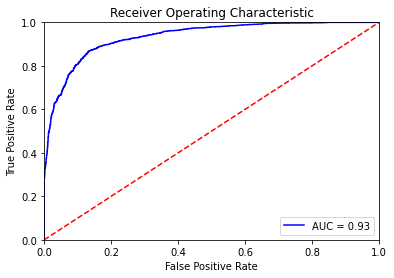

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()